# DATA RETRIEVAL
This part of work was done in VS code

In [ ]:
#Installing this API to read SAS file
!pip install pyreadstat

In [ ]:
import pyreadstat
import pandas as pd

In [ ]:
#Birth & Death Linked Data for the Year 2013
dtafile = 'linkco2013us_num.dta'
df_num, meta = pyreadstat.read_dta(dtafile)

In [ ]:
#Lets see some of the factors
print(df_num.shape)
print(meta.column_names_to_labels)
print(df_num.notnull().sum())

In [ ]:
#keeping a copy of the original data set
df_num_copy = df_num

In [ ]:
#Dropping the columns with null values
for column in df_num:
    if df_num[column].notnull().sum() == 0:
        df_num.drop([column],axis=1,inplace=True)

for column in df_num:
    if df_num[column].notnull().sum() < 500:
        df_num.drop([column],axis=1,inplace=True)


In [ ]:
#Importing the data from 2013 birth certificates, there is an idnumber for all deaths, and through this we can merge the two data sets
dtafile1 = 'linkco2013us_den.dta'
df_den, meta1 = pyreadstat.read_dta(dtafile1)

In [ ]:
#Lets see some of the factors
print(df_den.shape)
print(meta1.column_names_to_labels)
print(df_den.notnull().sum())

(3940764, 247)
{'revision': 'Revision U,R', 'laterec': 'Late Record Flag U,R', 'idnumber': 'Infant Death Number in numerator and denominator-plus', 'dob_yy': 'Birth Year U,R', 'dob_mm': 'Birth Month U,R', 'dob_wk': 'Birth Weekday U,R', 'ostate': 'Occurrence State U,R', 'ocntyfips': 'Occurrence FIPS County U,R', 'ocntypop': 'Occurence County Population U,R', 'bfacil': 'Birth Place R', 'ubfacil': 'Birth Place U,R', 'bfacil3': 'Birth Place Recode U,R', 'mage_impflg': "Mother's Age Imputated Flag U,R", 'mage_repflg': 'Reported Age of Mother Flag U,R', 'mager41': "Mother's Age Recode 41 U,R", 'mager14': "Mother's Age Recode 14 U,R", 'mager9': "Mother's Age Recode 9 U,R", 'mbcntry': "Mother's Birth Country R**", 'mrterr': "Mother's Residence Teritory U,R", 'mrcntyfips': "Mother's FIPS County of Residence (FIPS) U,R", 'rcnty_pop': 'Population of Residence County U,R', 'rectype': 'Record Type U,R', 'restatus': 'Resident Status U,R', 'mbrace': "Mother's Bridged Race U,R", 'mrace': "Mother's Rac

In [ ]:
#Dropping the columns with null values
for column in df_den:
    if df_den[column].notnull().sum() == 0:
        df_den.drop([column],axis=1,inplace=True)


In [ ]:
#keeping a copy of the original data set
df_den_copy = df_den

In [ ]:
#checking the shape of both data frames
print(df_num.shape)
print(df_den.shape)

(23159, 286)
(3940764, 215)


In [ ]:
left_join_df=pd.merge(df_den, df_num, on='idnumber', how='left')

In [ ]:
#check the merged dataset
print(left_join_df.shape)
print(left_join_df.notnull().sum())

In [ ]:
#Removing the suffix integrated during the merge
left_join_df.columns=left_join_df.columns.str.replace('_x', '')
left_join_df.columns=left_join_df.columns.str.replace('_y', '')

In [ ]:
#Removing Duplicate Columns
left_join_df = left_join_df.groupby(level=0, axis=1).first()

In [ ]:
#check the merged dataset
print(left_join_df.shape)
print(left_join_df.notnull().sum())

In [ ]:
#We will now create a target column, that will assign a value of 1 to the observations showing death incident, this will be useful to perform classification based machine learning algorithm 
left_join_df['death'] = 0
mask = left_join_df['idnumber'].notnull()
left_join_df.loc[mask, 'death'] = 1

In [ ]:
#To confirm the implementation of above code
print(left_join_df['death'].value_counts())

0    3917605
1      23159
Name: death, dtype: int64


##################### WE NOW HAVE THE FULL DATA SET ###########################

In [ ]:
#See the difference between the two files
print(left_join_df.shape)
print(read_file_df.shape)

In [ ]:
df_class_0 = left_join_df[left_join_df['death'] == 0]
df_class_1 = left_join_df[left_join_df['death'] == 1]

df_class_0_under = df_class_0.sample(23159)
df_class_1_over = df_class_1.sample(23159)

df_test_over = pd.concat([df_class_0_under, df_class_1_over], axis=0)


In [ ]:
#Saving the file
df_test_over.to_csv('final_df.csv',index=False)

#Code Run On Jupyter Notebook





In [ ]:
import pandas as pd
#Increase the output limit
pd.options.display.max_rows = 4000

In [ ]:
from google.colab import drive
# Mounted the drive from where the source excel file will be loaded and destination file will be created
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change directory to where the file is stored
%cd drive/Shareddrives/602Project

In [ ]:
df_sampled = pd.read_csv('final_df.csv', low_memory=False)
# The dataset is comprised of 46,318 Observations & 293 Features
df_sampled.shape

(46318, 293)

#Feature Engineering

In [ ]:
#Checking for data entry count in each column
df_sampled.notnull().sum()

ab_antibio        41888
ab_inj                0
ab_nicu           41888
ab_seiz               0
ab_surfac         41888
ab_vent           41888
ab_vent6          41888
aged              23159
ager22            23159
ager5             23159
apgar5            46318
apgar5r           46318
attend            46318
autopsy           23159
bfacil            41888
bfacil3           46318
bwtr14            46318
bwtr4             46318
ca_anen           41888
ca_chrom          41888
ca_cleft          41888
ca_cleftlp        41888
ca_downs          41888
ca_gastro         41888
ca_heart          41888
ca_hernia         41888
ca_hypos          41888
ca_limb           41888
ca_menin          41888
ca_ompha          41888
cig_1             41888
cig_2             41888
cig_3             41888
cig_rec           41888
cntrsppd              0
combgest          46318
d_restatus        23159
dbwt              46318
death             46318
dfpc_imp           1851
dispo             23159
dlmp_mm         

In [ ]:
#Dropping the columns with minimal values
for column in df_sampled:
    if df_sampled[column].notnull().sum() < 200:
        df_sampled.drop([column],axis=1,inplace=True)

In [ ]:
#Remainder columns count
df_sampled.shape

(46318, 237)

Selection of features based on the following criteria:
*   Reporting Flags
*   Duplicate features e.g., mother's age, mother's age recode 11, mother's age recode 14
*   Features logically relevant to fatality

In [ ]:
col_list= ['death','ucod', 'cig_rec', 'rf_diab', 'rf_gest', 'rf_phyp', 'rf_ghyp', 'rf_eclam', 'rf_ppterm', 'rf_ppoutc', 'rf_cesar', 'rf_ncesar', 'op_cerv', 'op_tocol', 'op_ecvs', 'op_ecvf', 'on_ruptr', 'on_abrup', 'on_prolg', 'ld_induct', 'ld_augment', 'ld_steroids', 'ld_antibio', 'ld_chorio', 'ld_mecon', 'ld_fintol', 'ld_anesth', 'uld_meco', 'uld_precip', 'uld_breech', 'md_present', 'md_route', 'md_trial', 'dmeth_rec',  'ab_surfac', 'ab_antibio', 'ca_anen', 'ca_menin', 'ca_heart', 'ca_hernia', 'ca_ompha', 'ca_gastro', 'ca_limb', 'ca_cleftlp', 'ca_cleft', 'ca_downs', 'ca_chrom', 'ca_hypos']
col_list1= ['ucod','cig_rec', 'rf_diab', 'rf_gest', 'rf_phyp', 'rf_ghyp', 'rf_eclam', 'rf_ppterm', 'rf_ppoutc', 'rf_cesar', 'rf_ncesar', 'op_cerv', 'op_tocol', 'op_ecvs', 'op_ecvf', 'on_ruptr', 'on_abrup', 'on_prolg', 'ld_induct', 'ld_augment', 'ld_steroids', 'ld_antibio', 'ld_chorio', 'ld_mecon', 'ld_fintol', 'ld_anesth', 'uld_meco', 'uld_precip', 'uld_breech', 'md_present', 'md_route', 'md_trial', 'dmeth_rec', 'ab_surfac', 'ab_antibio', 'ca_anen', 'ca_menin', 'ca_heart', 'ca_hernia', 'ca_ompha', 'ca_gastro', 'ca_limb', 'ca_cleftlp', 'ca_cleft', 'ca_downs', 'ca_chrom', 'ca_hypos']
df_sampled = df_sampled[col_list]


#Imputation
Filling the NaN cells with Zero

In [ ]:
df_sampled = df_sampled.fillna(value=0)

#One Hot Encoding

In [ ]:
#Converting into OHT format minus the target column
train = pd.get_dummies(df_sampled, columns=col_list1)

In [ ]:
#Removing the irrelevant columns having no values
column = train.columns[train.columns.str.contains(pat = '_0')]

train.drop(column,axis = 1,errors='ignore',inplace=True)

In [ ]:
#Train dataset to possess only the input variables
train = train.iloc[: , 1:]

In [ ]:
train.columns

Index(['ucod_A022', 'ucod_A047', 'ucod_A049', 'ucod_A081', 'ucod_A084',
       'ucod_A090', 'ucod_A099', 'ucod_A167', 'ucod_A370', 'ucod_A379',
       ...
       'ca_downs_N', 'ca_downs_P', 'ca_downs_U', 'ca_chrom_C', 'ca_chrom_N',
       'ca_chrom_P', 'ca_chrom_U', 'ca_hypos_N', 'ca_hypos_U', 'ca_hypos_Y'],
      dtype='object', length=1036)

In [ ]:
#Output dataset to contain the data with death flag for each observation
labels = df_sampled["death"]

#Data Modelling - Machine Learning Algorithm Implementation

In [ ]:
#Importing the required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,cross_val_predict,GridSearchCV)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import time
import numpy as np

In [ ]:
#Spliting the dataset in train & test 
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.4, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27790, 1031)
(18528, 1031)
(27790,)
(18528,)


Applying Randomized Search for Hyper Parameter Optimization




In [ ]:
def get_random_parametergrid_subset(grid, n, rngs=0):
  rng = np.random.default_rng(rngs)
  params = list(grid)
  return np.random.choice(params, size=n, replace=False)

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.base import clone
clf_rf = RandomForestClassifier(oob_score=True)

params = ParameterGrid({
    "n_estimators": [int(x) for x in np.linspace(100, 2000, 10)],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["auto", "sqrt", "log2"]
})
#Fitting the Model with best parameters set
best_score = -1
best_classifier = None
for k in get_random_parametergrid_subset(params, 10):
  print(k)
  c = clone(clf_rf)
  c.set_params(**k)
  c.fit(X_train.values, y_train)
  score = c.oob_score_
  print(f"   score={score}, best score={best_score}")
  if (score > best_score):
    best_score = score
    best_classifier = c

print(best_score)
print(best_classifier)
clf_rf = best_classifier

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
   score=0.8836631881971933, best score=-1
{'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 944}
   score=0.7693055055775458, best score=0.8836631881971933
{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 311}
   score=0.8367758186397984, best score=0.8836631881971933
{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 100}
   score=0.8340770061173084, best score=0.8836631881971933
{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 1366}
   score=0.8368477869737315, best score=0.8836631881971933
{'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 1577}
   score=0.7739834472831953, best score=0.8836631881971933
{'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 522}
   score=0.8363080244692336, best score=0.8836631881971933
{'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 1366}
   score=0.7558114429650954, best score=0.8

In [ ]:
#Generating the classification report
from sklearn.metrics import classification_report
predictions = clf_rf.predict(X_test.values) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      9303
           1       0.97      0.79      0.87      9225

    accuracy                           0.89     18528
   macro avg       0.90      0.89      0.89     18528
weighted avg       0.90      0.89      0.89     18528



In [ ]:
#Developing the Classification Diagram with One Decision Tree
estimator = clf_rf.estimators_[1]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = train.columns,
                class_names = ['Died','Alive'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
# Converting to png using system command
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Displaying in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Feature Importance

In [ ]:
start_time = time.time()
importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.038 seconds


In [ ]:
test=clf_rf.feature_importances_

temp = np.partition(-test, 7)
result = -temp[:7]

result

array([0.06702292, 0.05553616, 0.03821568, 0.01690482, 0.0320534 ,
       0.02021764, 0.02266051])

Plotting Important Features

Feature ranking:
1. feature 440 (0.067023)
2. feature 790 (0.055536)
3. feature 792 (0.038216)
4. feature 831 (0.032053)
5. feature 441 (0.022661)
6. feature 968 (0.020218)
7. feature 406 (0.016905)


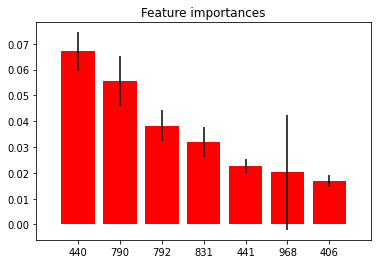

In [ ]:
indices = np.argsort(importances)[::-1]
top_k = 7
new_indices = indices[:top_k]

# Print the feature ranking
print("Feature ranking:")

for f in range(top_k):
    print("%d. feature %d (%f)" % (f + 1, new_indices[f], importances[new_indices[f]]))

#Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(top_k), importances[new_indices],
       color="r", yerr=std[new_indices], align="center")

#Edited here (put top_k in range)
plt.xticks(range(top_k), new_indices)
#Edited here (put top_k)
plt.xlim([-1, top_k])
plt.show()

In [ ]:
print(X_train.columns[440])
print(X_train.columns[790])
print(X_train.columns[792])
print(X_train.columns[831])
print(X_train.columns[441])
print(X_train.columns[968])
print(X_train.columns[406])


ucod_P072
ucod_R95
ucod_R99
ucod_W75
ucod_P073
uld_breech_1
ucod_P011




*   ucod_P072: Newborn affected by maternal hypertensive disorders
*   ucod_R95: Birth asphyxia
*   ucod_R99: Neonatal aspiration syndromes
*   ucod_W75: Newborn affected by incompetent cervix
*   ucod_P073: Newborn affected by other maternal conditions which may be unrelated to present pregnancy
*   uld_breech_1: Complications of Labor and Delivery (Breech Position) 
*   ucod_P011: Gonococcal infection

